In [5]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib import ticker, cm
import numpy as np
from numpy import ma
import csv
import matplotlib.font_manager as fm

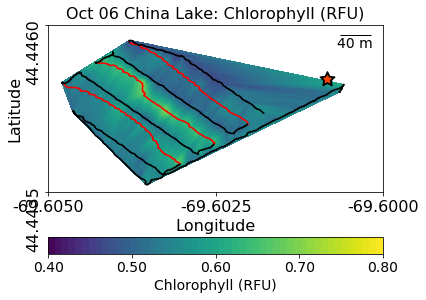

In [13]:
degree_sign= u'\N{DEGREE SIGN}'

CSV_FILE_PATH = '../../../../Data/ISER2021/China-catabot-20201006.csv'
#CSV_FILE_PATH2 = '../../../Data/ISER2021/Sunapee-20200715-path-2.csv'
#CSV_FILE_PATH3 = '../../../Data/ISER2021/Sunapee-20200715-path-3.csv'

with open(CSV_FILE_PATH, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path1_list = np.array(list(reader))
    
"""    
with open(CSV_FILE_PATH2, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path2_list = np.array(list(reader))
    
with open(CSV_FILE_PATH3, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path3_list = np.array(list(reader))
"""
#=============================== 07/15 ===============================

# one independent
# temp
#z = path1_list[0:2413,23]
#z = z.astype('float32')

# DO 30 temp 23 Chlorophyll 29
z = path1_list[0:2413,29]
z = z.astype('float32')

# gps x,y
x = path1_list[0:2413,2]
x = x.astype('float32')
y = path1_list[0:2413,1]
y = y.astype('float32')

"""

# PATH 1
# temp
z1 = path1_list[0:2126,23]
z1 = z1.astype('float32')

# gps x,y
x1 = path1_list[0:2126,2]
x1 = x1.astype('float32')
y1 = path1_list[0:2126,1]
y1 = y1.astype('float32')

## PATH 2
# temp
z2 = path2_list[0:998,23]
z2 = z2.astype('float32')

# gps x,y
x2 = path2_list[0:998,2]
x2 = x2.astype('float32')
y2 = path2_list[0:998,1]
y2 = y2.astype('float32')

## PATH 3
# temp
z3 = path3_list[0:597,23]
z3 = z3.astype('float32')

# gps x,y
x3 = path3_list[0:597,2]
x3 = x3.astype('float32')
y3 = path3_list[0:597,1]
y3 = y3.astype('float32')

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
z = np.concatenate([z1, z2, z3])
"""
#=====================================================================

f, ax = plt.subplots(figsize=(6,5.5))

#ax.set_title('Catabot 07/15 Sunapee path 1: Temperature (' + degree_sign + 'C)')
ax.set_title('Oct 06 China Lake: Chlorophyll (RFU)', fontsize=16)

vmax=0.80
vmin=0.40
levels = np.linspace(vmin,vmax, 50)

#cs = ax.tricontourf(x,y,z, 5, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03))
cs = ax.tricontourf(x,y,z, 5, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03), levels=levels,vmax=vmax,vmin=vmin)
#cs = ax.tricontourf(x,y,z, 20, vmin=24.35, vmax=26.94)
#cs = ax.tricontourf(x,y,z, 20)

cb_ticklabel = np.linspace(vmin, vmax, 5)
cb = f.colorbar(cs, ticks=cb_ticklabel, orientation='horizontal', format='%.2f')


ax.set_xlabel('Longitude', fontsize=16)
plt.xlim([-69.6050, -69.6000])
ax.set_xticks(np.arange(-69.6050, -69.6000, 0.0025))
#f.canvas.draw()
ax.set_xticklabels(['-69.6050', '-69.6025', '-69.6000'])

ax.set_ylabel('Latitude', fontsize=16)
plt.ylim([44.4435, 44.4460])
ax.set_yticks(np.arange(44.4435, 44.4461, 0.0025))
f.canvas.draw()
#ax.set_yticklabels(['44.4435', '44.4440', '44.4445', '44.4450', '44.4455', '44.4460'])
ax.set_yticklabels(['44.4435','44.4460'])
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='y', labelrotation=90)

# path 1,2,3
NW_range_1 = np.arange(806,1046,1)
NW_range_2 = np.arange(1384,1621,1)
NW_range_3 = np.arange(1940,2162,1)

#for k in range(1, len(x)):
#    if k not in NW_range_1 or k not in NW_range_2 or k not in NW_range_3:
#        ax.plot(x[k-1:k],y[k-1:k],marker='o', color='k', markersize=0.5)
#ax.plot(x,y,marker='o', color='k', markersize=0.1)
#ax.plot(x2,y2,marker='o', color='b', markersize=0.1)
#ax.plot(x3,y3,marker='o', color='r', markersize=0.1)

# NW directions
NW_1_x = x[806:1045]
NW_1_y = y[806:1045]
ax.plot(NW_1_x,NW_1_y,marker='o', color='r', markersize=0.1)

NW_2_x = x[1384:1620]
NW_2_y = y[1384:1620]
ax.plot(NW_2_x,NW_2_y,marker='o', color='r', markersize=0.1)

NW_3_x = x[1940:2162]
NW_3_y = y[1940:2162]
ax.plot(NW_3_x,NW_3_y,marker='o', color='r', markersize=0.1)

# other direction
X_0 = x[0:805]
Y_0 = y[0:805]
ax.plot(X_0,Y_0,marker='o', color='k', markersize=0.1)

X_1 = x[1046:1383]
Y_1 = y[1046:1383]
ax.plot(X_1,Y_1,marker='o', color='k', markersize=0.1)

X_2 = x[1621:1939]
Y_2 = y[1621:1939]
ax.plot(X_2,Y_2,marker='o', color='k', markersize=0.1)

X_3 = x[2163:]
Y_3 = y[2163:]
ax.plot(X_3,Y_3,marker='o', color='k', markersize=0.1)


ax.set_aspect('equal')
plt.grid(True)

# boathouse
ax.plot(np.array([-69.6008402]), np.array([44.4451898]), color='k', marker=(5,1), markersize=16)
ax.plot(np.array([-69.6008402]), np.array([44.4451898]), color='#FF4500', marker=(5,1), markersize=8)


"""
# summer buoy
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='yellow', marker='o', markersize=8)

# winter buoy
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='m', marker='o', markersize=8)
"""
fontprops = fm.FontProperties(size=14)
bar = AnchoredSizeBar(ax.transData, 0.00046, '40 m', 'upper right', pad=0.6, frameon=False, fontproperties=fontprops)
ax.add_artist(bar)
ax.grid(False)

#color bar activate
#cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=14)
cb.set_label(label='Chlorophyll (RFU)', size=14)
cb.ax.xaxis.set_ticks_position('bottom')
#cb.set_clim(0.4, 0.8)
#cb.ax.xaxis.set_ticks(np.arange(0.40, 0.81, 0.1))
#cb.ax.set_xticklabels(['0.4', '0.5', '0.6', '0.7', '0.8'])


f.savefig('1006-China-RFU-color-path.pdf', bbox_inches ='tight')
# to save only color bar

plt.show()

#f.savefig('color_bar_only_RFU.pdf', bbox_inches ='tight')
#plt.show()

In [3]:
min(z), max(z)

(0.44358364, 0.71203446)